<a href="https://colab.research.google.com/github/cmerino15/MachineLearning/blob/main/graduateML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div>
<img src="https://drive.google.com/uc?id=11HUzmxG7IjzDRuVfR-K31YkJmEJFi3Mc" alt="Drawing" width="300px" align="right"/>
</div>

# Machine Learning for student success 
## Data from [Student Success](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention)

## Organizing Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv("graduate.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

## Want to focus on Graduate vs Dropout 
### Need to convert strings to numbers

In [ ]:
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
df.drop(df[df['Target'] == 'Enrolled'].index, inplace=True)


In [ ]:
df["Target"] = (df["Target"] == "Dropout").astype(int)

In [ ]:
df.Target.value_counts()

0    2209
1    1421
Name: Target, dtype: int64

# Graph Dataframe: Columns vs Target
## Used to do some quick data analysis

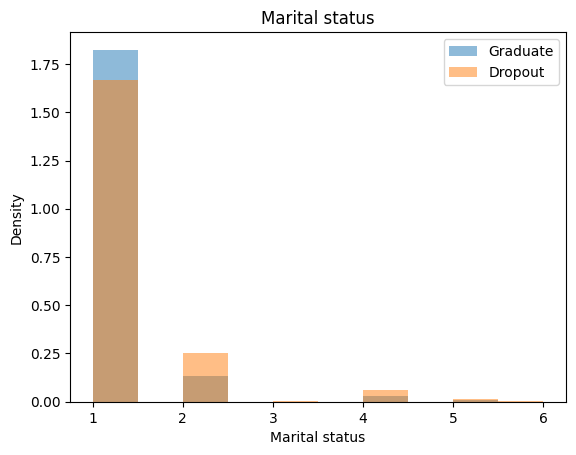

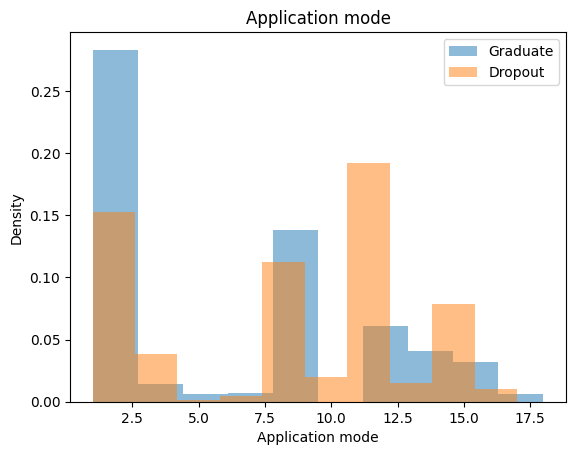

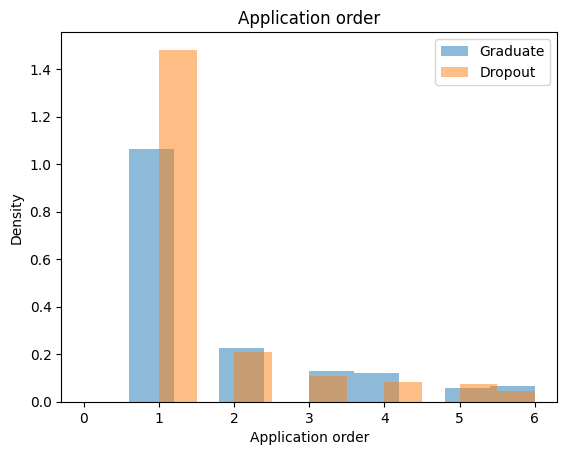

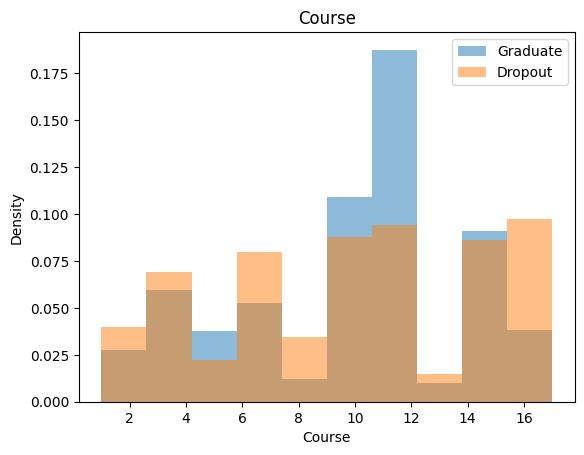

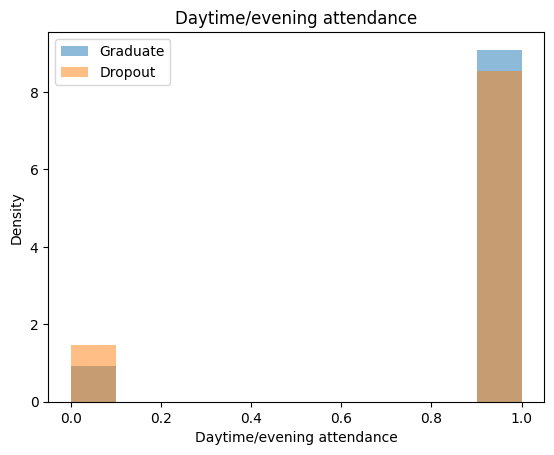

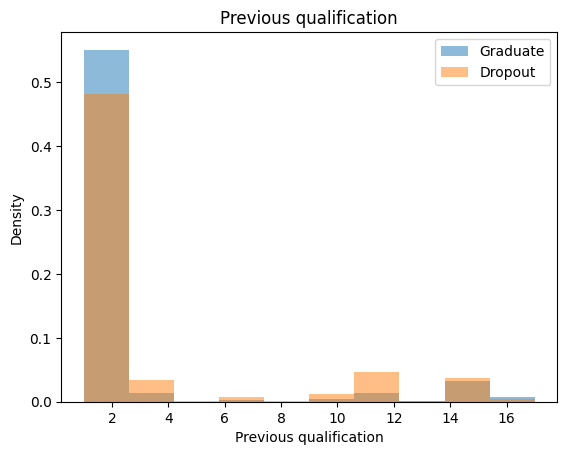

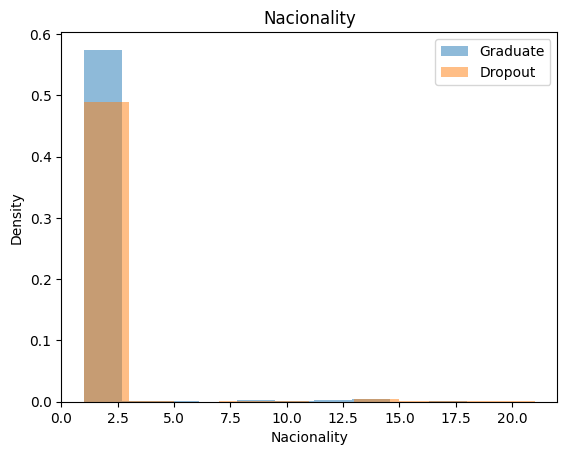

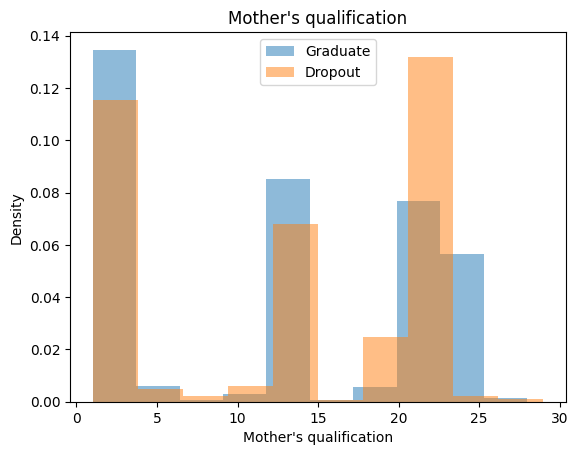

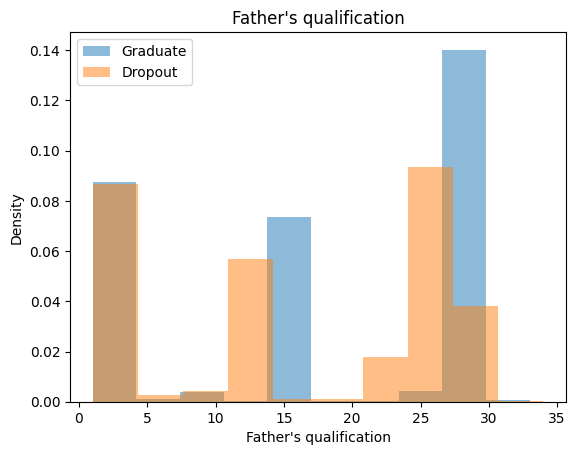

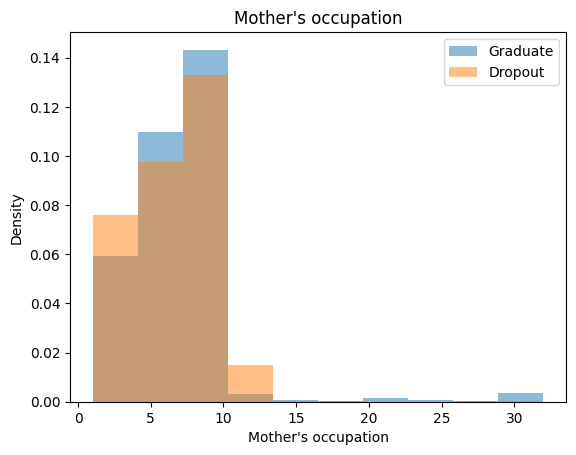

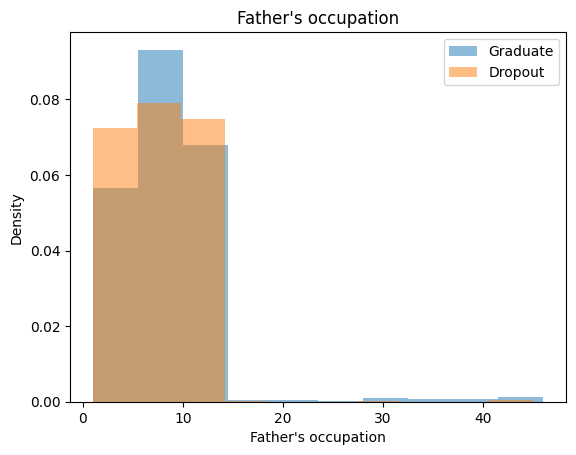

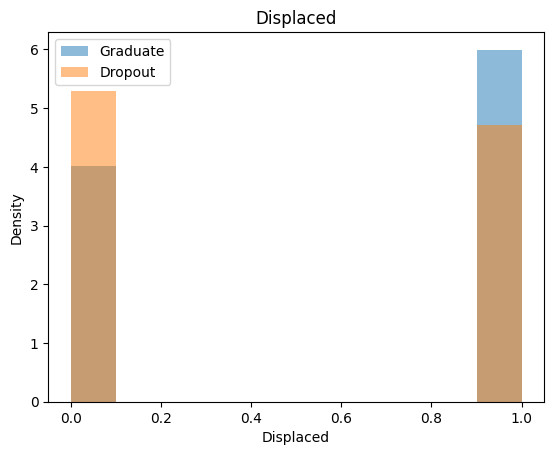

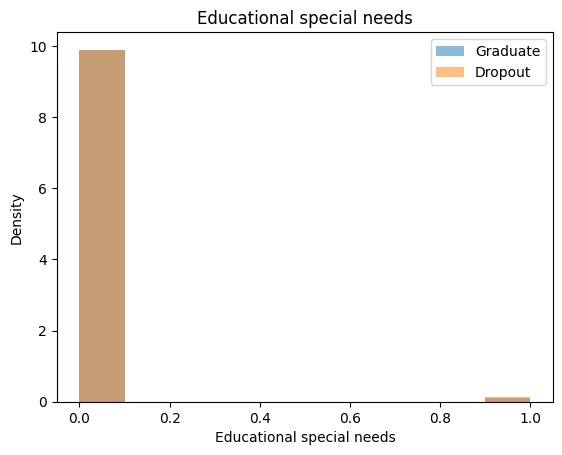

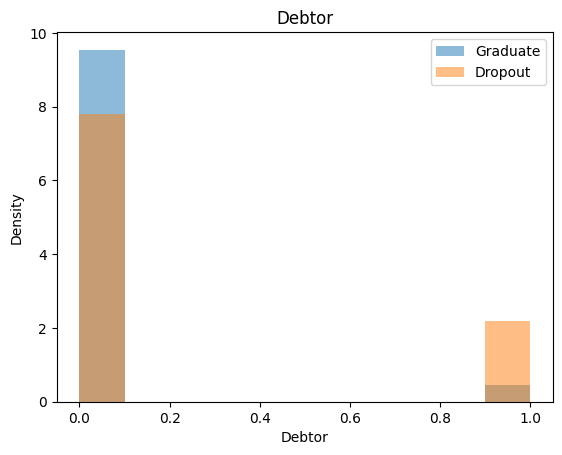

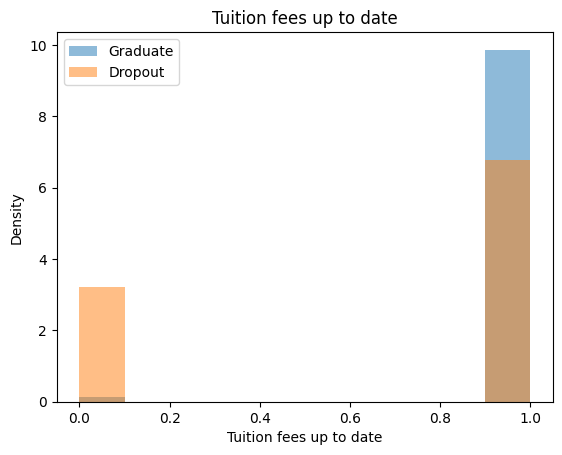

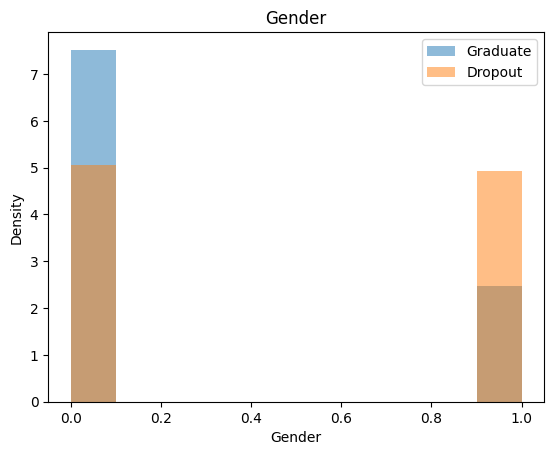

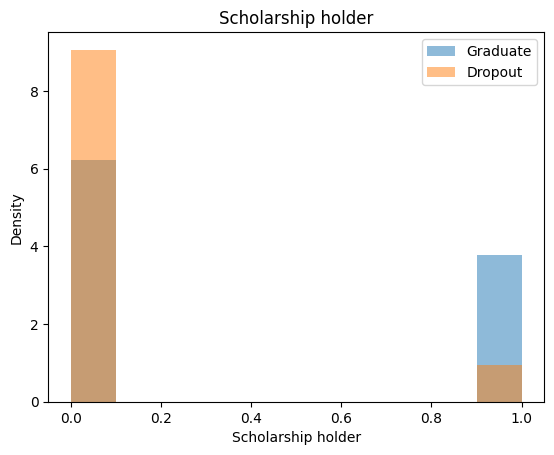

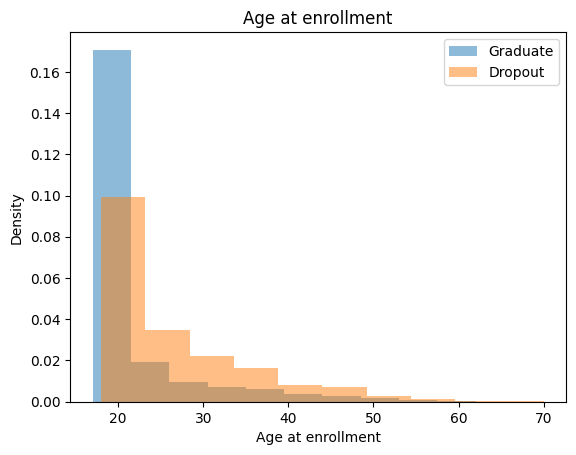

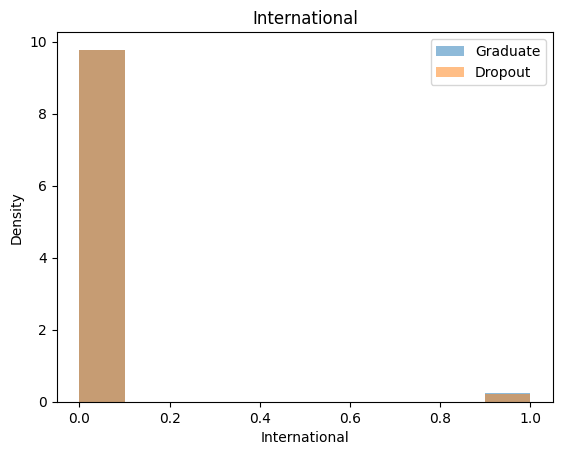

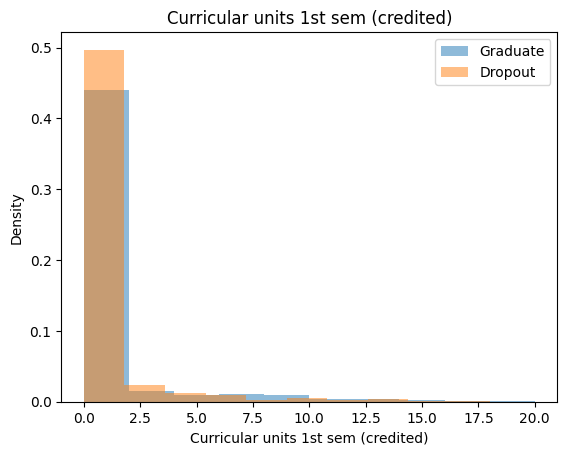

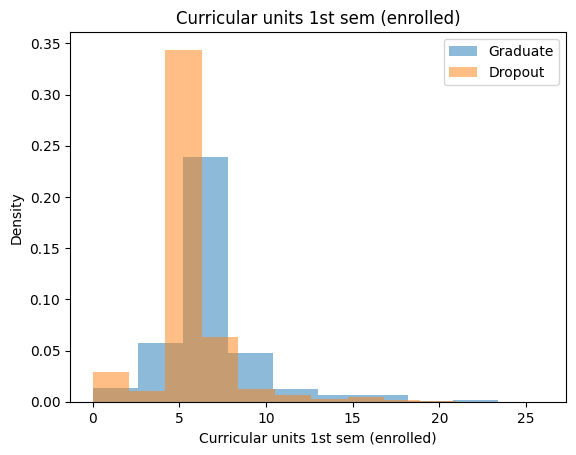

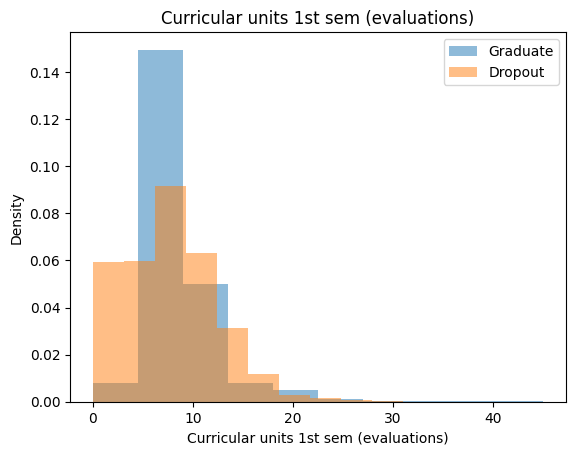

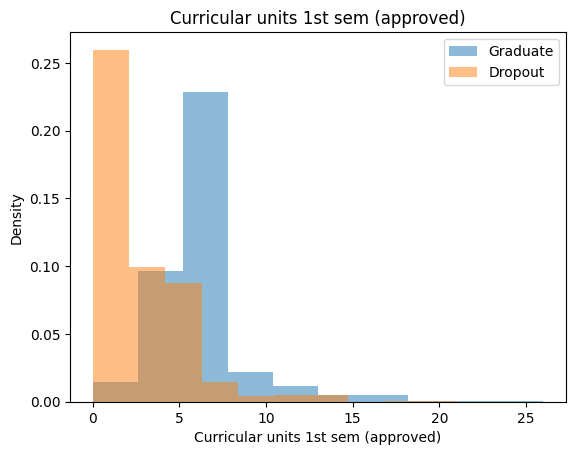

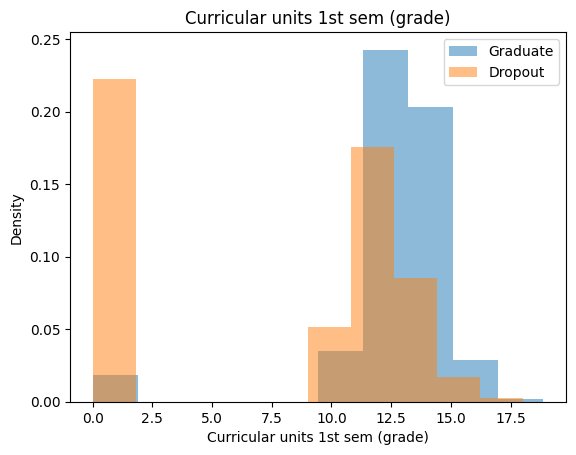

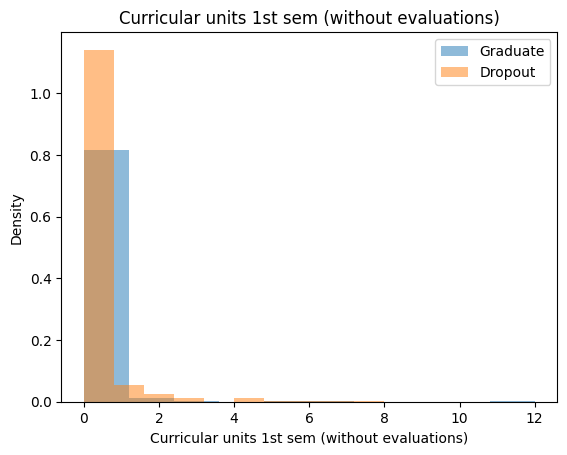

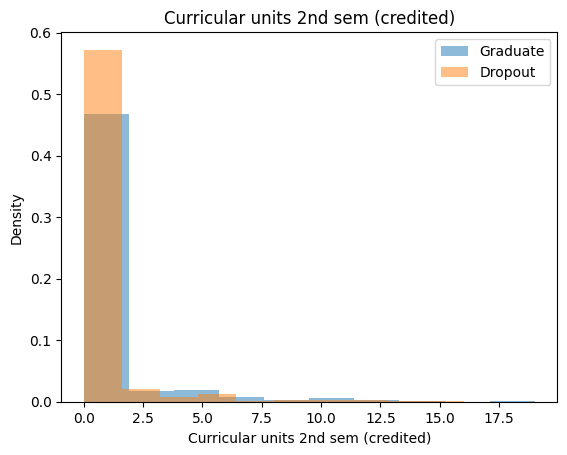

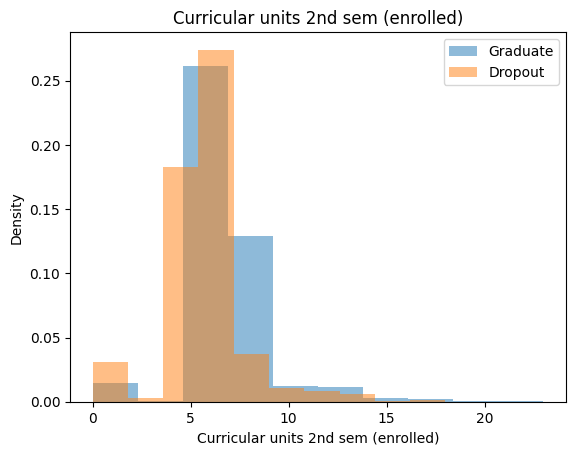

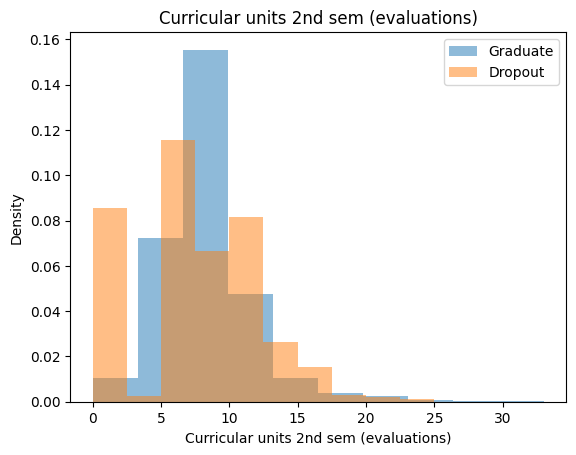

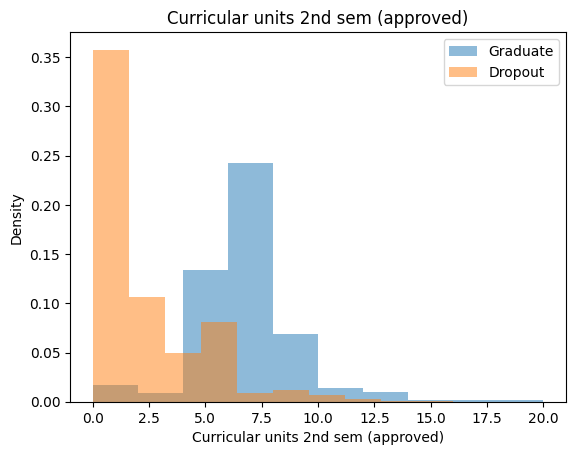

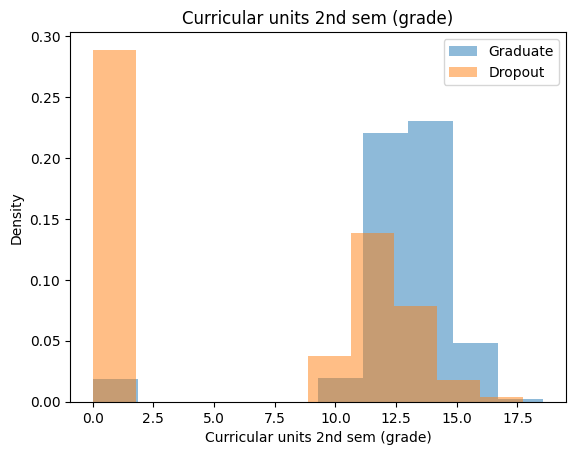

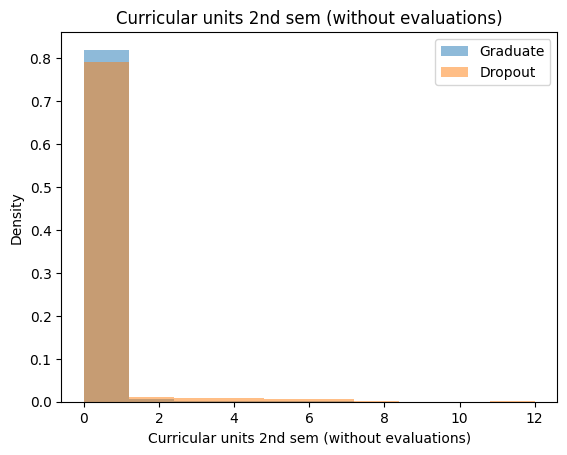

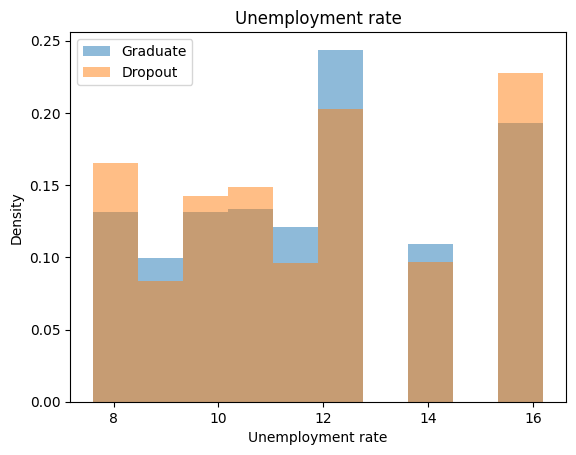

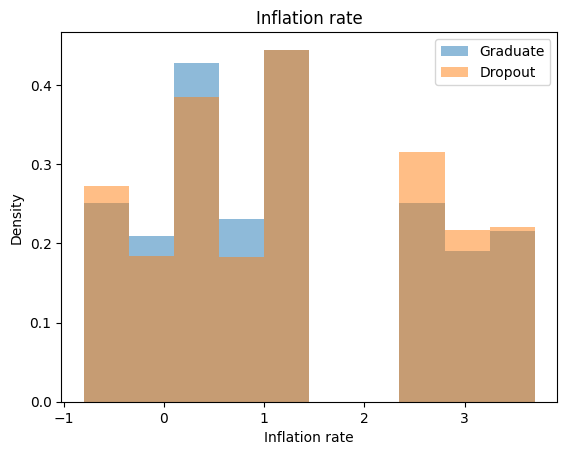

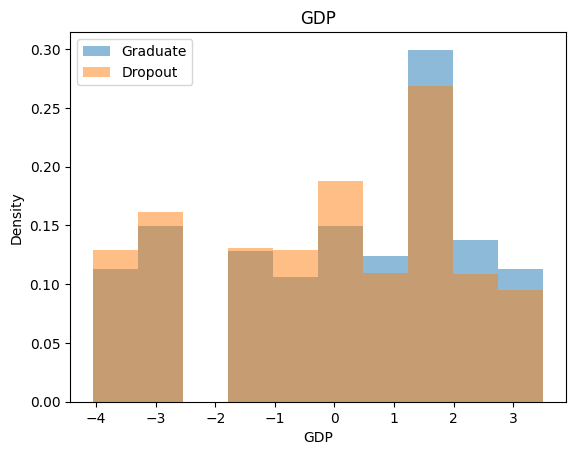

In [ ]:
for label in df.columns[:-1]:
    plt.hist(df[df["Target"]==0][label], alpha=0.5, label="Graduate", density=True)
    plt.hist(df[df["Target"]==1][label], alpha=0.5, label="Dropout", density=True)
    plt.title(label)
    plt.ylabel("Density")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Split Data into training, validation, and testing sets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))]) # 60, 20, 10

# notice the counts don't match. Hence, oversample
print(len(train[train["Target"]==1]))
print(len(train[train["Target"]==0]))

#train.shape, valid.shape, test.shape

#train.head()

831
1347


In [ ]:
#valid.head()

In [ ]:
#test.head()

# Scale dataframe values and oversample to match 

In [ ]:
def scale(df, oversample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y



In [ ]:
train, X_train, y_train = scale(train, oversample=True)
valid, X_valid, y_valid = scale(valid, oversample=False)
test, X_test, y_test = scale(test, oversample=False)

print(len(y_train))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))



2694
1347
1347


# K-Nearest Neighbor Implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# could try below with validation data
y_pred = knn.predict(X_test)
# should be like accuracy in class report
print(sum(y_pred == y_test)/len(y_test))

print(classification_report(y_test, y_pred))

0.8471074380165289
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       417
           1       0.88      0.74      0.80       309

    accuracy                           0.85       726
   macro avg       0.86      0.83      0.84       726
weighted avg       0.85      0.85      0.84       726



# Results 
# Overall a good accuracy score near 85% using KNN

# Using Neural Networks to improve models

In [ ]:
import tensorflow as tf

# Plot Functions

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# Setup up Neural Network

In [ ]:
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(34,)), # 35 columns minus 1 for target
    tf.keras.layers.Dropout(.2), # 20% dropout to prevent overfitting
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [ ]:
history = nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2) # could set verbose to 0 


Epoch 1/100
68/68 [==============================] - 2s 9ms/step - loss: 0.5627 - accuracy: 0.7462 - val_loss: 0.5347 - val_accuracy: 0.7440
Epoch 2/100
68/68 [==============================] - 0s 5ms/step - loss: 0.3781 - accuracy: 0.8552 - val_loss: 0.4319 - val_accuracy: 0.8015
Epoch 3/100
68/68 [==============================] - 0s 4ms/step - loss: 0.3134 - accuracy: 0.8752 - val_loss: 0.4042 - val_accuracy: 0.8404
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.8910 - val_loss: 0.3644 - val_accuracy: 0.8553
Epoch 5/100
68/68 [==============================] - 0s 6ms/step - loss: 0.2701 - accuracy: 0.8974 - val_loss: 0.3428 - val_accuracy: 0.8701
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.9053 - val_loss: 0.3583 - val_accuracy: 0.8627
Epoch 7/100
68/68 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.9095 - val_loss: 0.3641 - val_accuracy: 0.8609
Epoch 8/100
6

# Plot

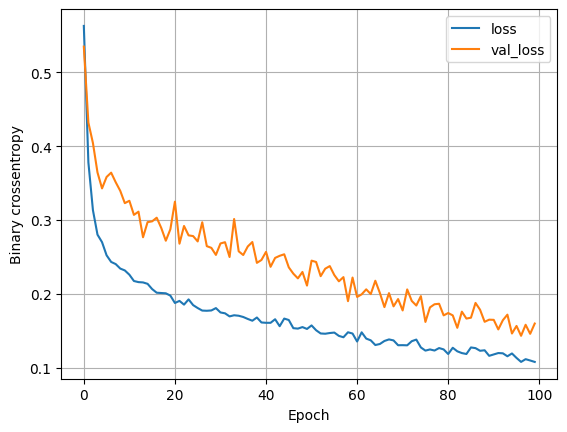

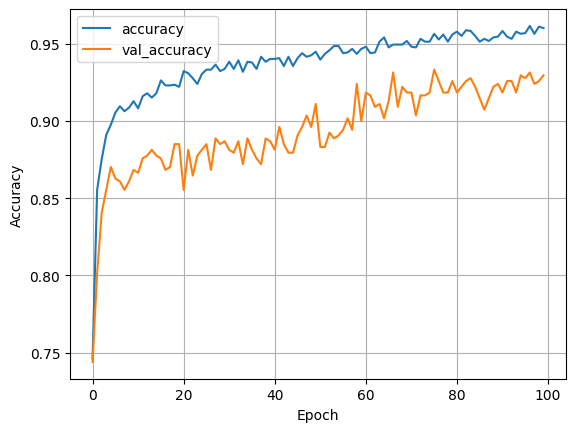

In [ ]:
plot_loss(history)
plot_acc(history)

In [ ]:
y_pred = nn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
#print(y_pred)
print(classification_report(y_test, y_pred))

# no difference with below
#y_pred = y_pred.reshape(-1,)
#print(y_pred)
#print(classification_report(y_test, y_pred))


23/23 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       417
           1       0.93      0.83      0.88       309

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       417
           1       0.93      0.83      0.88       309

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



# Results 
# Overall, a good accuracy score near 90% using a NN
# compareable to KNN

# Final Results and comparison

In [ ]:
# compare KNN with NN
y_pred = knn.predict(X_test)
print("KNeighborsClassifier\n")
print(classification_report(y_test, y_pred))

y_pred = nn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("Neural Network\n")
print(classification_report(y_test, y_pred))



KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       417
           1       0.88      0.74      0.80       309

    accuracy                           0.85       726
   macro avg       0.86      0.83      0.84       726
weighted avg       0.85      0.85      0.84       726
 



23/23 [==============================] - 0s 6ms/step
Neural Network

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       417
           1       0.93      0.83      0.88       309

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726

